In [1]:
import json
import random
import warnings
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import spotipy
import spotipy.util as util

# Data preparation

In [3]:
username = ''
scope = 'user-library-read'
token=util.prompt_for_user_token(username,scope,
                          client_id='',
                          client_secret='',
                          # web app redirect url
                          redirect_uri='http://localhost:3000/callback')

In [4]:
# token headers = {"Authorization": "Bearer {}".format(token)}

In [5]:
#basic url: https://api.spotify.com/v1
#entry different countries playlist by id and website response json data

#taking top playlist, 06/02/2023;
basic_url="https://api.spotify.com/v1/playlists/"

id_chart=pd.DataFrame([ #Europe
                        ['Germany','37i9dQZEVXbJiZcmkrIHGU'],
                        ['French','37i9dQZEVXbIPWwFssbupI'],
                        ['Norway','37i9dQZEVXbJvfa0Yxg7E7'],
                        ['Spain','37i9dQZEVXbNFJfN1Vw8d9'],
                        ['Italy','37i9dQZEVXbIQnj7RRhdSX'],
                        ['Austria','37i9dQZEVXbKNHh6NIXu36'],
                        ['Ukraine','37i9dQZEVXbKkidEfWYRuD'],
                        ['Greece','37i9dQZEVXbJqdarpmTJDL'],
                        #Africa
                        ['Morocco','37i9dQZEVXbJU9eQpX8gPT'],
                        #America
                        ['America','37i9dQZEVXbLRQDuF5jeBp'],
                        ['Brazil','37i9dQZEVXbMXbN3EUUhlg'],
                        #Asia
                        ['South Korea','37i9dQZEVXbNxXF4SkHj9F'],
                        ['Japan','37i9dQZEVXbKXQ4mDTEBXq'],
                        ['Indonesia','37i9dQZEVXbObFQZ3JLcXt'],
                        ['Thailand','37i9dQZEVXbMnz8KIWsvf9'],
                        #Global
                        ['Global','37i9dQZEVXbMDoHDwVN2tF']
                        ])
id_chart=id_chart.rename(columns={0: "Country", 1: "Playlist_id"})
print(id_chart)

        Country             Playlist_id
0       Germany  37i9dQZEVXbJiZcmkrIHGU
1        French  37i9dQZEVXbIPWwFssbupI
2        Norway  37i9dQZEVXbJvfa0Yxg7E7
3         Spain  37i9dQZEVXbNFJfN1Vw8d9
4         Italy  37i9dQZEVXbIQnj7RRhdSX
5       Austria  37i9dQZEVXbKNHh6NIXu36
6       Ukraine  37i9dQZEVXbKkidEfWYRuD
7        Greece  37i9dQZEVXbJqdarpmTJDL
8       Morocco  37i9dQZEVXbJU9eQpX8gPT
9       America  37i9dQZEVXbLRQDuF5jeBp
10       Brazil  37i9dQZEVXbMXbN3EUUhlg
11  South Korea  37i9dQZEVXbNxXF4SkHj9F
12        Japan  37i9dQZEVXbKXQ4mDTEBXq
13    Indonesia  37i9dQZEVXbObFQZ3JLcXt
14     Thailand  37i9dQZEVXbMnz8KIWsvf9
15       Global  37i9dQZEVXbMDoHDwVN2tF


In [6]:
def get_song_attributes(response_text):
    return json.loads(response_text)


def get_song(playlist_jsondata, songs_attributes, songs_names):
    for item in playlist_jsondata.get('tracks')['items']:
        song_ids = item['track']['uri'].split(':')[2]
        song_name = item['track']['name']
        song_attributes = requests.get(f"https://api.spotify.com/v1/audio-features/{song_ids}", headers=headers)
        songs_attributes.append(get_song_attributes(song_attributes.text))
        songs_names.append(song_name)

country_list=[]
for index,rows in id_chart.iterrows():
    my_songs_attributes = []
    my_songs_names = []
    print("Processing playlist for:" + rows["Country"])
    responses = requests.get(basic_url+rows["Playlist_id"], headers=headers)
    myjson_data = json.loads(responses.text)
    get_song(myjson_data, my_songs_attributes, my_songs_names)
    df = pd.DataFrame(my_songs_attributes)
    df['Country']=rows["Country"]
    country_list.append(df)


Processing playlist for:Germany
Processing playlist for:French
Processing playlist for:Norway
Processing playlist for:Spain
Processing playlist for:Italy
Processing playlist for:Austria
Processing playlist for:Ukraine
Processing playlist for:Greece
Processing playlist for:Morocco
Processing playlist for:America
Processing playlist for:Brazil
Processing playlist for:South Korea
Processing playlist for:Japan
Processing playlist for:Indonesia
Processing playlist for:Thailand
Processing playlist for:Global


In [7]:
#concat all country's top songs to one single list
df=pd.concat(country_list)
df=df.reset_index(drop=True)

In [8]:
#export a csv version for processing
df.to_csv("mydata.csv")
copy_list = country_list

# Data processing part

In [9]:
df=pd.read_csv("mydata.csv")
copy_list = country_list

In [10]:
def get_mean_df(df):
    df_des=df.describe()
    meancolumn=df_des.loc["mean"]
    return meancolumn

In [11]:
mean_list=[]
#loop every dataframe we collected grouped by country
for df in copy_list:
    mean=get_mean_df(df)
    mean_list.append(mean)

mean_dataframe=pd.concat(mean_list,axis=1)
c_name=id_chart["Country"].tolist()
mean_dataframe.columns=c_name
mean_dataframe.to_csv("meandata.csv")

# Virsualization

In [12]:
import matplotlib.patches as mpatches
mean_graph_data = mean_dataframe

Danceability

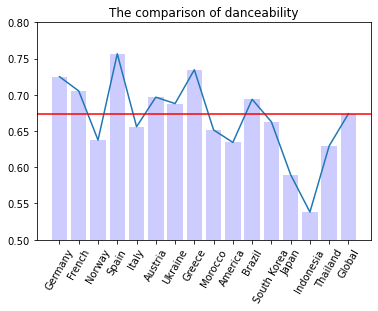

In [13]:
x=mean_graph_data.columns.tolist()
y=mean_graph_data.loc["danceability"].tolist()

plt.bar(x,y,alpha=0.2,color='b')
plt.plot(x,y)
plt.title("The comparison of danceability")
plt.axhline(mean_graph_data["Global"].loc["danceability"].tolist(),color='r')
plt.xticks(rotation=60)
# plt.yticks([0.4,1])
plt.ylim([0.5,0.8])
plt.show()


Energy

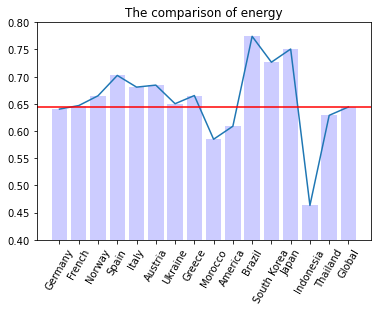

In [14]:
x=mean_graph_data.columns.tolist()
y=mean_graph_data.loc["energy"].tolist()

plt.bar(x,y,alpha=0.2,color='b')
plt.plot(x,y)
plt.title("The comparison of energy")
plt.axhline(mean_graph_data["Global"].loc["energy"].tolist(),color='r')
plt.xticks(rotation=60)
plt.ylim([0.4,0.8])
plt.show()

Loudness

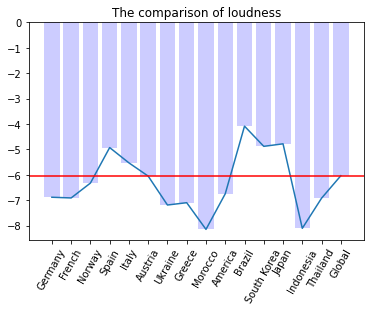

In [15]:
x=mean_graph_data.columns.tolist()
y=mean_graph_data.loc["loudness"].tolist()

plt.bar(x,y,alpha=0.2,color='b')
plt.plot(x,y)
plt.title("The comparison of loudness")
plt.axhline(mean_graph_data["Global"].loc["loudness"].tolist(),color='r')
plt.xticks(rotation=60)
plt.show()

mode

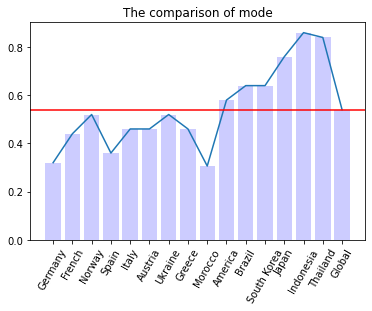

In [16]:
x=mean_graph_data.columns.tolist()
y=mean_graph_data.loc["mode"].tolist()

plt.bar(x,y,alpha=0.2,color='b')
plt.plot(x,y)
plt.title("The comparison of mode")
plt.axhline(mean_graph_data["Global"].loc["mode"].tolist(),color='r')
plt.xticks(rotation=60)
plt.show()

speechiness

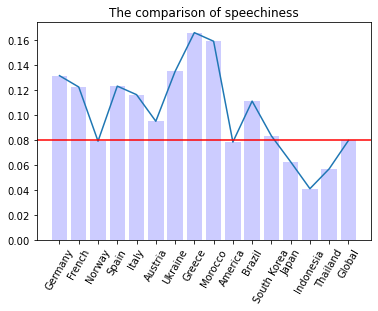

In [17]:
x=mean_graph_data.columns.tolist()
y=mean_graph_data.loc["speechiness"].tolist()

plt.bar(x,y,alpha=0.2,color='b')
plt.plot(x,y)
plt.title("The comparison of speechiness")
plt.axhline(mean_graph_data["Global"].loc["speechiness"].tolist(),color='r')
plt.xticks(rotation=60)
plt.show()

acousticness

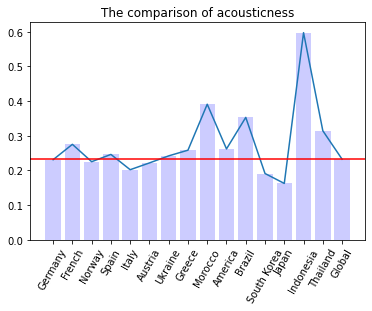

In [18]:
x=mean_graph_data.columns.tolist()
y=mean_graph_data.loc["acousticness"].tolist()

plt.bar(x,y,alpha=0.2,color='b')
plt.plot(x,y)
plt.title("The comparison of acousticness")
plt.axhline(mean_graph_data["Global"].loc["acousticness"].tolist(),color='r')
plt.xticks(rotation=60)
plt.show()

instrumentalness

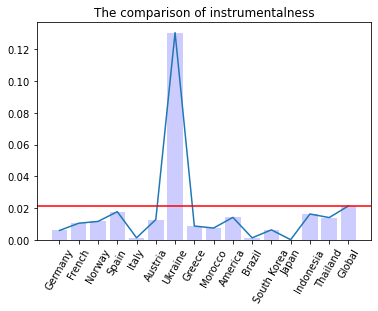

In [19]:
x=mean_graph_data.columns.tolist()
y=mean_graph_data.loc["instrumentalness"].tolist()

plt.bar(x,y,alpha=0.2,color='b')
plt.plot(x,y)
plt.title("The comparison of instrumentalness")
plt.axhline(mean_graph_data["Global"].loc["instrumentalness"].tolist(),color='r')
plt.xticks(rotation=60)
plt.show()

liveness

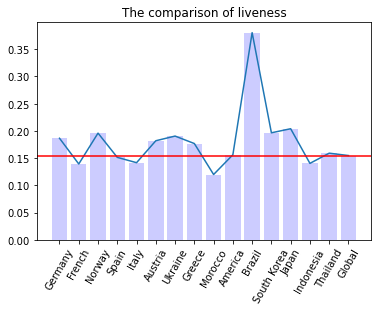

In [20]:
x=mean_graph_data.columns.tolist()
y=mean_graph_data.loc["liveness"].tolist()

plt.bar(x,y,alpha=0.2,color='b')
plt.plot(x,y)
plt.title("The comparison of liveness")
plt.axhline(mean_graph_data["Global"].loc["liveness"].tolist(),color='r')
plt.xticks(rotation=60)
plt.show()

valence

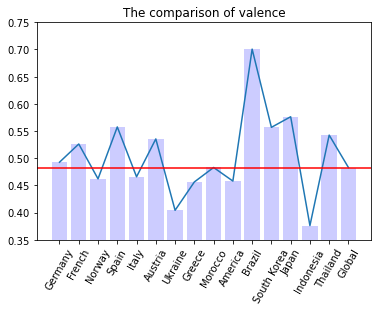

In [21]:
x=mean_graph_data.columns.tolist()
y=mean_graph_data.loc["valence"].tolist()

plt.bar(x,y,alpha=0.2,color='b')
plt.plot(x,y)
plt.title("The comparison of valence")
plt.axhline(mean_graph_data["Global"].loc["valence"].tolist(),color='r')
plt.xticks(rotation=60)
plt.ylim([0.35,0.75])
plt.show()

tempo

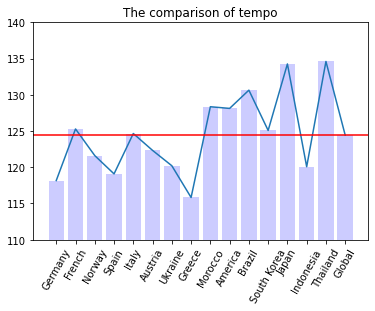

In [22]:
x=mean_graph_data.columns.tolist()
y=mean_graph_data.loc["tempo"].tolist()

plt.bar(x,y,alpha=0.2,color='b')
plt.plot(x,y)
plt.title("The comparison of tempo")
plt.axhline(mean_graph_data["Global"].loc["tempo"].tolist(),color='r')
plt.xticks(rotation=60)
plt.ylim([110,140])
plt.show()

duration_ms

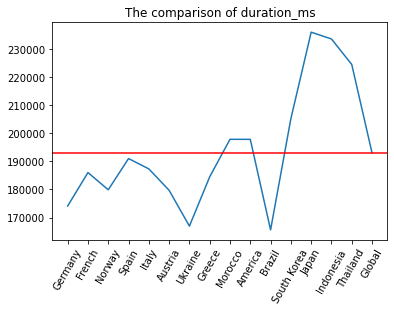

In [23]:
x=mean_graph_data.columns.tolist()
y=mean_graph_data.loc["duration_ms"].tolist()

plt.plot(x,y)
plt.title("The comparison of duration_ms")
plt.axhline(mean_graph_data["Global"].loc["duration_ms"].tolist(),color='r')
plt.xticks(rotation=60)
plt.show()